In [1]:
import numpy as np
import pandas as pd
import gdreg
import time
import os
import matplotlib.pyplot as plt

# autoreload
%load_ext autoreload
%autoreload 2

In [9]:
# JOB = "compute_phen"
# PGEN_FILE = "/n/groups/price/martin/WES_analysis/toy_1K/chr@_v1.SPB.hg19.toy_1K"
# EFF_FILE = "/n/groups/price/martin/WES_analysis/toy_1K/sanity_nd_rep0.eff.gz"
# PHEN_FILE = None
# PREFIX_OUT = "/n/groups/price/martin/WES_analysis/toy_1K/sanity_rep0"
# RANDOM_SEED = 0
# MEMORY = 128

In [2]:
JOB = "compute_sumstats"
PGEN_FILE = "/n/groups/price/martin/WES_analysis/toy_1K/chr@_v1.SPB.hg19.toy_1K"
EFF_FILE = None
PHEN_FILE = "/n/groups/price/martin/WES_analysis/toy_1K/sanity_nd_rep0.phen"
PREFIX_OUT = "/n/groups/price/martin/WES_analysis/toy_1K/sanity_nd_rep0"
RANDOM_SEED = 0
MEMORY = 128

In [3]:
sys_start_time = time.time()

###########################################################################################
######                                    Parse Options                              ######
###########################################################################################

# JOB = args.job
# PGEN_FILE = args.pgen_file
# EFF_FILE = args.eff_file
# PHEN_FILE = args.phen_file
# PREFIX_OUT = args.prefix_out
# MEMORY = args.memory
# RANDOM_SEED = args.random_seed

# Parse and check arguments
LEGAL_JOB_LIST = ["compute_phen", "compute_sumstats"]
err_msg = "# run_gdreg: --job=%s not supported" % JOB
assert JOB in LEGAL_JOB_LIST, err_msg

if (EFF_FILE is None) & (JOB in ["compute_phen"]):
    raise ValueError("# run_simulation.py: --eff_file required for --job=%s" % JOB)
if (PHEN_FILE is None) & (JOB in ["compute_sumstats"]):
    raise ValueError("# run_simulation.py: --phen_file required for --job=%s" % JOB)

# Print input options
header = gdreg.util.get_cli_head()
header += "Call: run_simulation.py \\\n"
header += "--job %s\\\n" % JOB
header += "--pgen_file %s\\\n" % PGEN_FILE
header += "--eff_file %s\\\n" % EFF_FILE
header += "--phen_file %s\\\n" % PHEN_FILE
header += "--prefix_out %s\\\n" % PREFIX_OUT
header += "--memory %d\\\n" % MEMORY
header += "--random_seed %d\n" % RANDOM_SEED
print(header)

******************************************************************************
* Gene-level directional effect regression (GDReg)
* Version 0.0.2
* Martin Jinye Zhang
* HSPH / Broad Institute
* MIT License
******************************************************************************
Call: run_simulation.py \
--job compute_sumstats\
--pgen_file /n/groups/price/martin/WES_analysis/toy_1K/chr@_v1.SPB.hg19.toy_1K\
--eff_file None\
--phen_file /n/groups/price/martin/WES_analysis/toy_1K/sanity_nd_rep0.phen\
--prefix_out /n/groups/price/martin/WES_analysis/toy_1K/sanity_nd_rep0\
--memory 128\
--random_seed 0



In [4]:
###########################################################################################
######                                   Data Loading                                ######
###########################################################################################
# Load genotype data
if JOB in ["compute_phen", "compute_sumstats"]:
    print("# Loading --pgen_file")
    dic_data = {}
    for CHR in range(1, 23):
        if os.path.exists(PGEN_FILE.replace("@", "%s" % CHR) + ".pgen"):
            dic_data[CHR] = gdreg.util.read_pgen(PGEN_FILE.replace("@", "%s" % CHR))

    print("    Genotype data for %d CHRs:" % len(dic_data))
    for CHR in dic_data:
        n_sample = dic_data[CHR]["psam"].shape[0]
        n_snp = dic_data[CHR]["pvar"].shape[0]
        print("        CHR%2d (%d samples %d SNPs)" % (CHR, n_sample, n_snp))
    print("    " + gdreg.util.get_sys_info(sys_start_time))

# Load EFF_FILE
if JOB in ["compute_phen"]:
    print("# Loading --eff_file")
    df_effect = pd.read_csv(EFF_FILE, sep="\t", index_col=None)

    n_snp = df_effect.shape[0]
    n_CHR = len(set(df_effect["CHR"]))
    h2g = (df_effect["EFF"] ** 2).sum()
    print("    %s SNPs from %d CHRs, h2g=%0.3f" % (n_snp, n_CHR, h2g))
    print("    " + gdreg.util.get_sys_info(sys_start_time))

if JOB in ["compute_sumstats"]:
    print("# Loading --phen_file")
    df_phen = pd.read_csv(PHEN_FILE, sep="\t", index_col=None)
    phen_name = df_phen.columns[2]

    print("    %d samples, phen_name=%s" % (df_phen.shape[0], phen_name))
    print("    " + gdreg.util.get_sys_info(sys_start_time))

# Loading --pgen_file
    Genotype data for 10 CHRs:
        CHR 1 (1000 samples 1400 SNPs)
        CHR 2 (1000 samples 1322 SNPs)
        CHR 3 (1000 samples 1326 SNPs)
        CHR 4 (1000 samples 1341 SNPs)
        CHR 5 (1000 samples 1311 SNPs)
        CHR 6 (1000 samples 1341 SNPs)
        CHR 7 (1000 samples 1375 SNPs)
        CHR 8 (1000 samples 1320 SNPs)
        CHR 9 (1000 samples 1307 SNPs)
        CHR10 (1000 samples 1280 SNPs)
    sys_time=2.2s, sys_mem=0.097GB
# Loading --phen_file
    1000 samples, phen_name=TRAIT
    sys_time=2.2s, sys_mem=0.097GB


In [90]:
if JOB == "compute_phen":
    print("# Running --job compute_phen")
    df_phen = gdreg.simulate.simulate_phen(
        df_effect, dic_data, block_size=500, random_seed=RANDOM_SEED, verbose=True
    )
#     df_phen.to_csv(PREFIX_OUT + ".phen", sep="\t", index=False)
    print("    " + gdreg.util.get_sys_info(sys_start_time))

# Running --job compute_phen
# Call: gdreg.simulate.simulate_phen
    SNPs: 13323 in df_effect, 13323 in dic_data, overlap=13323
    1000/1000 samples present in all 10 CHRs
    h2g=0.48, h2e=0.52
    block_size=500, random_seed=0
    Completed, time=0.2s
    sys_time=3116.5s, sys_mem=0.17GB


In [5]:
if JOB == "compute_sumstats":
    print("# Running --job compute_sumstats")
    df_sumstats = gdreg.simulate.compute_sumstats(
        df_phen, dic_data, block_size=500, verbose=True
    )
#     df_sumstats.to_csv(PREFIX_OUT + ".sumstats.gz", sep="\t", index=False)
    print("    " + gdreg.util.get_sys_info(sys_start_time))

# Running --job compute_sumstats
# Call: gdreg.simulate.compute_sumstats
    13323 SNPs in dic_data
    1000 samples in df_phen, 1000/1000 present in all 10 CHRs in dic_data
    block_size=500
    Completed, time=0.3s
    sys_time=36.9s, sys_mem=0.099GB


### Test correctness for simulate_phen

In [81]:
dic_eff = {x:y for x,y in zip(df_effect['SNP'], df_effect['EFF'])}
v_phen_g = np.zeros(1000)

for CHR in range(1,11):
    mat_X = gdreg.util.read_geno(dic_data[CHR]["pgen"], 0, dic_data[CHR]["pvar"].shape[0])
    mat_X = mat_X.T.astype(np.float64)
    mat_X[mat_X==-9] = 0
    v_maf = mat_X.mean(axis=0) * 0.5
    mat_X = mat_X - 2*v_maf
    mat_X = mat_X / np.sqrt(2*v_maf*(1-v_maf))
    v_beta = np.array([dic_eff[x] for x in dic_data[CHR]["pvar"]['SNP']], dtype=np.float32)
    v_phen_g += mat_X.dot(v_beta)

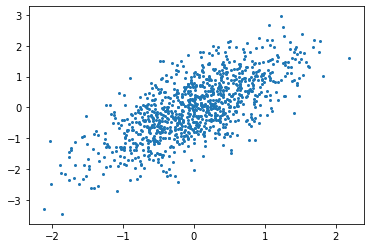

0.6971449928566809

In [92]:
plt.figure()
plt.scatter(v_phen_g, df_phen.loc[['%s:%s'%(x,x) for x in dic_data[1]['psam']['FID']], 'TRAIT'], s=4)
plt.show()
np.corrcoef(v_phen_g, df_phen.loc[['%s:%s'%(x,x) for x in dic_data[1]['psam']['FID']], 'TRAIT'])[0,1]

### Test correctness for simulate_phen


In [10]:
temp_df = df_phen.copy()
temp_df.index = temp_df['FID']
temp_df = temp_df.loc[dic_data[1]['psam']['FID']]
v_phen = temp_df['TRAIT'].values

In [16]:
for CHR in range(1,11):
    mat_X = gdreg.util.read_geno(dic_data[CHR]["pgen"], 0, dic_data[CHR]["pvar"].shape[0])
    mat_X = mat_X.T.astype(np.float64)
    mat_X[mat_X==-9] = 0
    v_maf = mat_X.mean(axis=0) * 0.5
    mat_X = mat_X - 2*v_maf
    mat_X = mat_X / np.sqrt(2*v_maf*(1-v_maf))
    
    v_sumstats = mat_X.T.dot(v_phen) / np.sqrt(1000)
    print(CHR, (v_sumstats**2).mean())

1 1.624612961692607
2 1.1840694698237746
3 1.251596805076339
4 1.2951413998015027
5 1.508056978000138
6 2.618206219580351
7 1.3056692260059424
8 1.2540686394703981
9 1.2056809621183113
10 1.071909862887717


In [17]:
dic_data[6]['pvar']

,CHR,BP,SNP,REF,ALT
0,6,292658,6:292658:T:C,T,C
1,6,311938,6:311938:C:T,C,T
2,6,312023,6:312023:C:T,C,T
3,6,397038,6:397038:D:17,TCTCCTGCACTCCTTTAC,T
4,6,397261,6:397261:G:A,G,A
...,...,...,...,...,...
1336,6,30030114,6:30062337:A:G,G,A
1337,6,30032495,6:30064718:A:G,A,G
1338,6,30032522,6:30064745:A:C,A,C
1339,6,30036333,6:30068556:G:C,G,C


In [14]:
v_sumstats.shape

(1400,)

In [15]:
df_sumstats.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279],
           dtype='int64', length=13323)